<a href="https://colab.research.google.com/github/britaniatorsulu/202055202084-Wastitorsulu/blob/master/tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wastibritaniatorsulu","key":"3f3524ef2445cdbc7d7f7c6a2abe17a1"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 76 Apr 13 08:09 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 94% 206M/219M [00:00<00:00, 251MB/s]
100% 219M/219M [00:00<00:00, 235MB/s]


In [10]:
!unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [11]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib
import splitfolders

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [13]:
base_ds = '../content/Rice_Image_Dataset'
base_ds = pathlib.Path(base_ds)

In [14]:
splitfolders.ratio(base_ds, output='imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 75000 files [00:10, 7411.82 files/s]


In [15]:
arborio = [fn for fn in os.listdir(f'{base_ds}/Arborio') if fn.endswith('.jpg')]
bastmati = [fn for fn in os.listdir(f'{base_ds}/Basmati') if fn.endswith('.jpg')]
ipsala = [fn for fn in os.listdir(f'{base_ds}/Ipsala') if fn.endswith('.jpg')]
jasmine = [fn for fn in os.listdir(f'{base_ds}/Jasmine') if fn.endswith('.jpg')]
karacadag = [fn for fn in os.listdir(f'{base_ds}/Karacadag') if fn.endswith('.jpg')]
rice = [arborio, bastmati, ipsala, jasmine, karacadag]
rice_classes = []
for i in os.listdir('imgs/train'):
    rice_classes+=[i]
rice_classes.sort()

Total images: 75000
Total number of classes: 5
Total Arborio images: 15000
Total Basmati images: 15000
Total Ipsala images: 15000
Total Jasmine images: 15000
Total Karacadag images: 15000


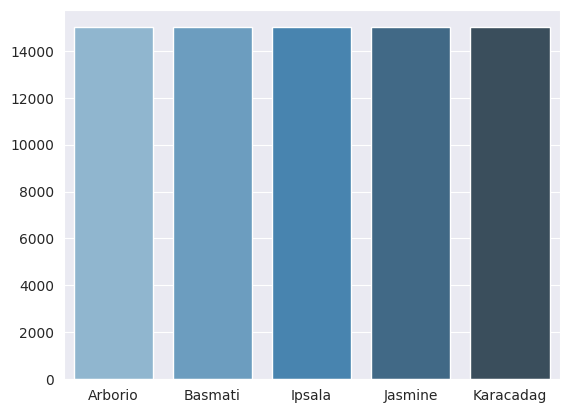

In [16]:
image_count = len(list(base_ds.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(rice_classes)}')
count = 0
rice_count = []
for x in rice_classes:
  print(f'Total {x} images: {len(rice[count])}')
  rice_count.append(len(rice[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=rice_classes, y=rice_count, palette="Blues_d")
plt.show()

Image dimensions: (250, 250, 3)


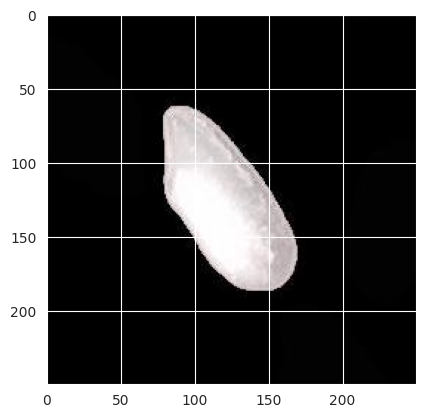

In [17]:
sample_img = cv2.imread('imgs/test/Arborio/Arborio (10).jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

In [18]:
def load_random_img(dir, label):
  plt.figure(figsize=(10,10))
  i=0
  for label in rice_classes:
    i+=1
    plt.subplot(1, 5, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

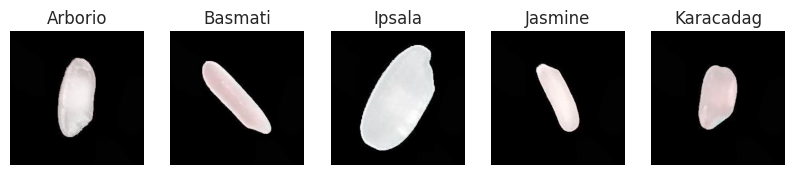

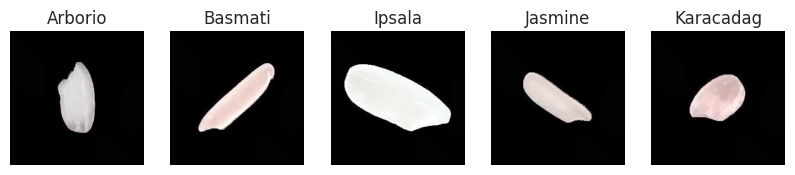

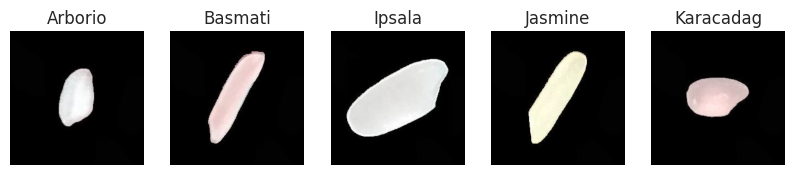

In [19]:
for i in range(3):
  load_random_img(base_ds, rice_classes)

In [20]:
batch_size = 128
img_height, img_width = 175, 175
input_shape = (img_height, img_width, 3)

In [21]:
datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_ds = datagen.flow_from_directory(
    'imgs/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical')

val_ds = datagen.flow_from_directory(
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


In [23]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [24]:
model_vanilla = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [25]:
model_vanilla.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 173, 173, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 173, 173, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 173, 173, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 173, 173, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                        

In [26]:
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

checkpointer = ModelCheckpoint(filepath='saved_models/model_vanilla.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [27]:
history1 = model_vanilla.fit(train_ds, epochs = 40, validation_data = val_ds, callbacks=callbacks)

Epoch 1/40
411/411 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9668
Epoch 1: val_accuracy improved from -inf to 0.42000, saving model to saved_models/model_vanilla.hdf5
411/411 [==============================] - 307s 695ms/step - loss: 0.0991 - accuracy: 0.9668 - val_loss: 4.4566 - val_accuracy: 0.4200 - lr: 0.0010
Epoch 2/40
411/411 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9886
Epoch 2: val_accuracy improved from 0.42000 to 0.82836, saving model to saved_models/model_vanilla.hdf5
411/411 [==============================] - 284s 691ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.5351 - val_accuracy: 0.8284 - lr: 0.0010
Epoch 3/40
411/411 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9905
Epoch 3: val_accuracy improved from 0.82836 to 0.99058, saving model to saved_models/model_vanilla.hdf5
411/411 [==============================] - 283s 689ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.

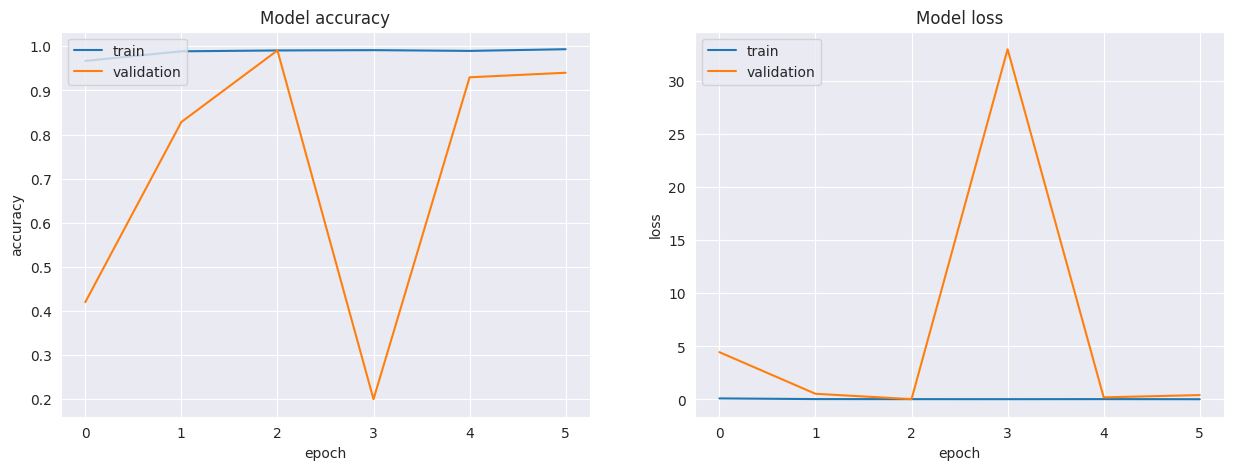

In [28]:
model_vanilla.load_weights('saved_models/model_vanilla.hdf5')
plot_train_history(history1)

In [29]:
score1 = model_vanilla.evaluate(test_ds, verbose=1)

88/88 [==============================] - 23s 260ms/step - loss: 0.0337 - accuracy: 0.9897


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model_vanilla.predict(test_ds)

88/88 [==============================] - 27s 302ms/step


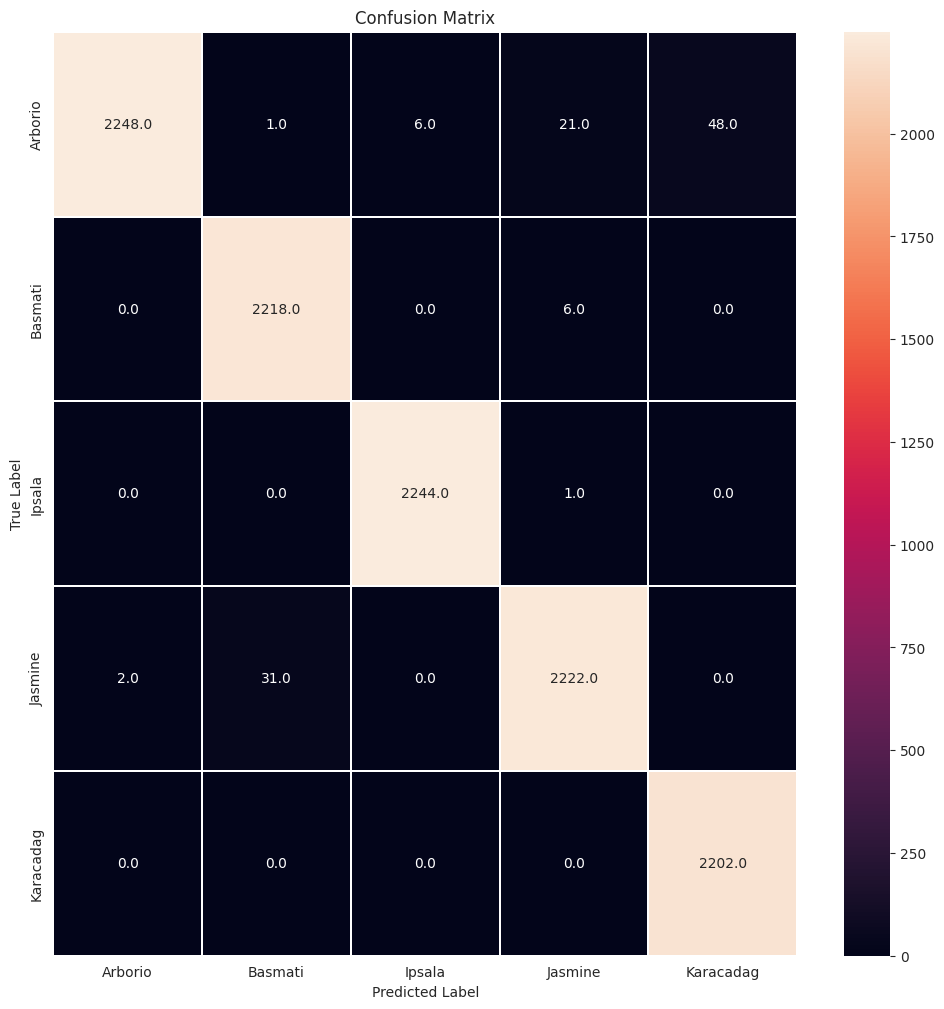

In [31]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [32]:
report1 = classification_report(test_ds.classes, y_pred, target_names=rice_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

,precision,recall,f1-score,support
Arborio,0.967298,0.999111,0.982947,2250.000000
Basmati,0.997302,0.985778,0.991506,2250.000000
Ipsala,0.999555,0.997333,0.998443,2250.000000
Jasmine,0.985366,0.987556,0.986459,2250.000000
Karacadag,1.000000,0.978667,0.989218,2250.000000
accuracy,0.989689,0.989689,0.989689,0.989689
macro avg,0.989904,0.989689,0.989715,11250.000000
weighted avg,0.989904,0.989689,0.989715,11250.000000


In [33]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16.trainable = False
inputs = tf.keras.Input(input_shape)
x = vgg16(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)
model_vgg16 = tf.keras.Model(inputs, x)

58889256/58889256 [==============================] - 0s 0us/step


In [34]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 175, 175, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dense_4 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 15,245,125
Trainable params: 530,437
Non-trainable params: 14,714,688
___________________________________________

In [35]:
checkpointer = ModelCheckpoint(filepath='saved_models/model_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [36]:
history2 = model_vgg16.fit(train_ds, epochs = 40, validation_data = val_ds, callbacks=callbacks)

Epoch 1/40
411/411 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9568
Epoch 1: val_accuracy improved from -inf to 0.98098, saving model to saved_models/model_vgg16.hdf5
411/411 [==============================] - 204s 469ms/step - loss: 0.1729 - accuracy: 0.9568 - val_loss: 0.0631 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 2/40
411/411 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9862
Epoch 2: val_accuracy did not improve from 0.98098
411/411 [==============================] - 179s 435ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0740 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 3/40
411/411 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9885
Epoch 3: val_accuracy improved from 0.98098 to 0.99236, saving model to saved_models/model_vgg16.hdf5
411/411 [==============================] - 178s 433ms/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.0265 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 4/40
411/4

In [37]:
model_vgg16.load_weights('saved_models/model_vgg16.hdf5')

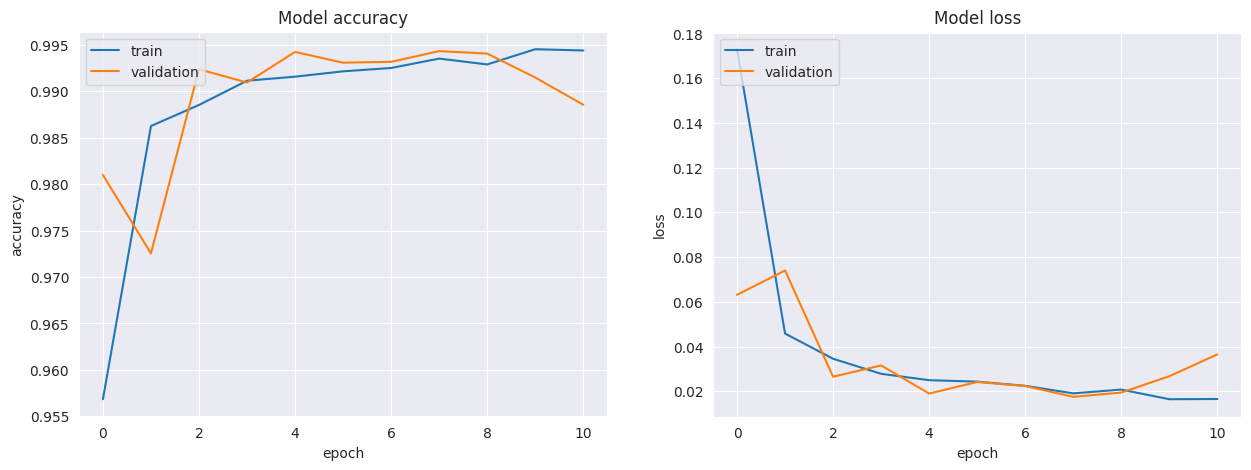

In [38]:
plot_train_history(history2)

In [39]:
score2 = model_vgg16.evaluate(test_ds, verbose=1)
print(f'Model 1 Vanilla Loss: {score1[0]}, Accuracy: {score1[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')

88/88 [==============================] - 34s 379ms/step - loss: 0.0167 - accuracy: 0.9946
Model 1 Vanilla Loss: 0.033665552735328674, Accuracy: 98.96888732910156
Model 2 VGG16 Loss: 0.016728756949305534, Accuracy: 99.45777654647827


In [40]:
vgg16.trainable = True
model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history3 = model_vgg16.fit(train_ds, epochs = 40, validation_data = val_ds, callbacks=callbacks)

Epoch 1/40
411/411 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9954
Epoch 1: val_accuracy improved from 0.99431 to 0.99689, saving model to saved_models/model_vgg16.hdf5
411/411 [==============================] - 520s 1s/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0114 - val_accuracy: 0.9969 - lr: 1.0000e-05
Epoch 2/40
411/411 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9983
Epoch 2: val_accuracy did not improve from 0.99689
411/411 [==============================] - 499s 1s/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0197 - val_accuracy: 0.9952 - lr: 1.0000e-05
Epoch 3/40
411/411 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9987
Epoch 3: val_accuracy improved from 0.99689 to 0.99858, saving model to saved_models/model_vgg16.hdf5
411/411 [==============================] - 500s 1s/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0064 - val_accuracy: 0.9986 - lr: 1.0000e-05
Epoch 4/40

In [42]:
model_vgg16.load_weights('saved_models/model_vgg16.hdf5')

In [43]:
score3 = model_vgg16.evaluate(test_ds, verbose=1)
print(f'Model 1 Vanilla Loss: {score1[0]}, Accuracy: {score1[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')
print(f'Model 2 VGG16 Fine-tuned Loss: {score3[0]}, Accuracy: {score3[1]*100}')

88/88 [==============================] - 32s 362ms/step - loss: 0.0039 - accuracy: 0.9985
Model 1 Vanilla Loss: 0.033665552735328674, Accuracy: 98.96888732910156
Model 2 VGG16 Loss: 0.016728756949305534, Accuracy: 99.45777654647827
Model 2 VGG16 Fine-tuned Loss: 0.003853730158880353, Accuracy: 99.84889030456543


In [44]:
Y_pred = model_vgg16.predict(test_ds)

88/88 [==============================] - 33s 369ms/step


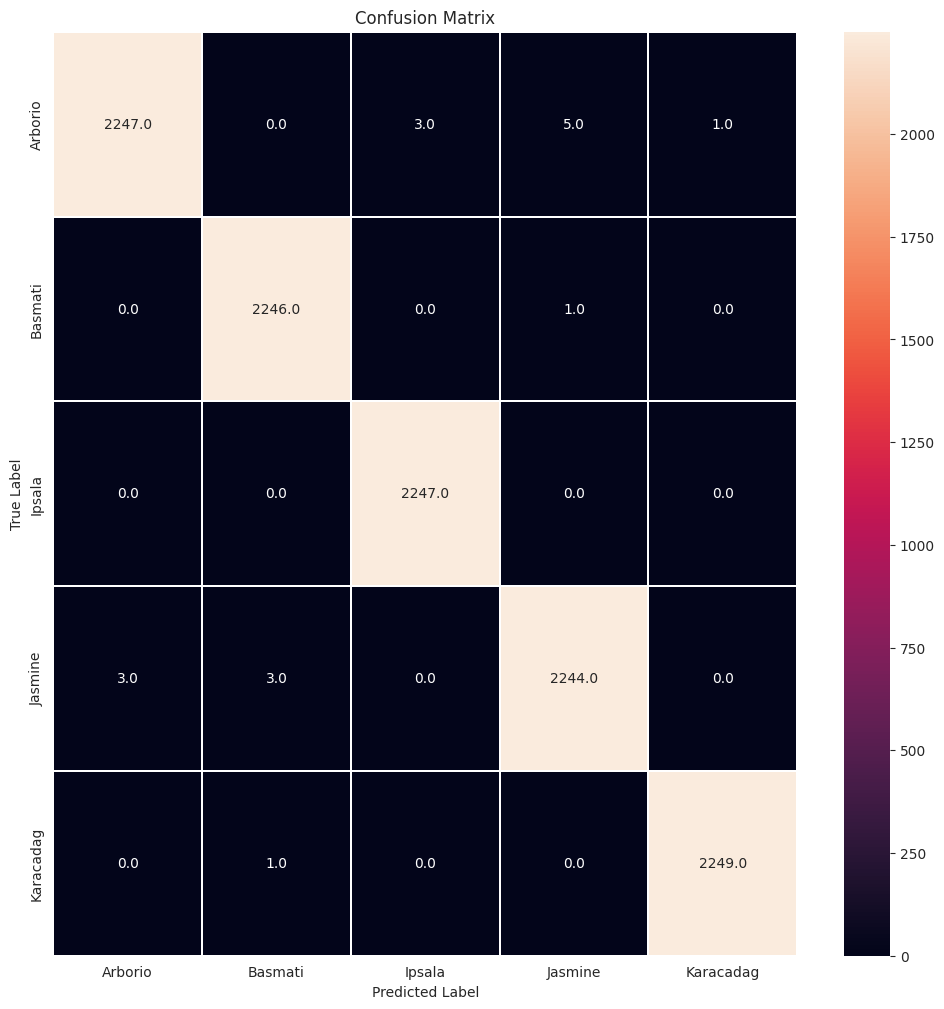

In [45]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [46]:
report2 = classification_report(test_ds.classes, y_pred, target_names=rice_classes, output_dict=True)
df2 = pd.DataFrame(report1).transpose()
df2

,precision,recall,f1-score,support
Arborio,0.967298,0.999111,0.982947,2250.000000
Basmati,0.997302,0.985778,0.991506,2250.000000
Ipsala,0.999555,0.997333,0.998443,2250.000000
Jasmine,0.985366,0.987556,0.986459,2250.000000
Karacadag,1.000000,0.978667,0.989218,2250.000000
accuracy,0.989689,0.989689,0.989689,0.989689
macro avg,0.989904,0.989689,0.989715,11250.000000
weighted avg,0.989904,0.989689,0.989715,11250.000000


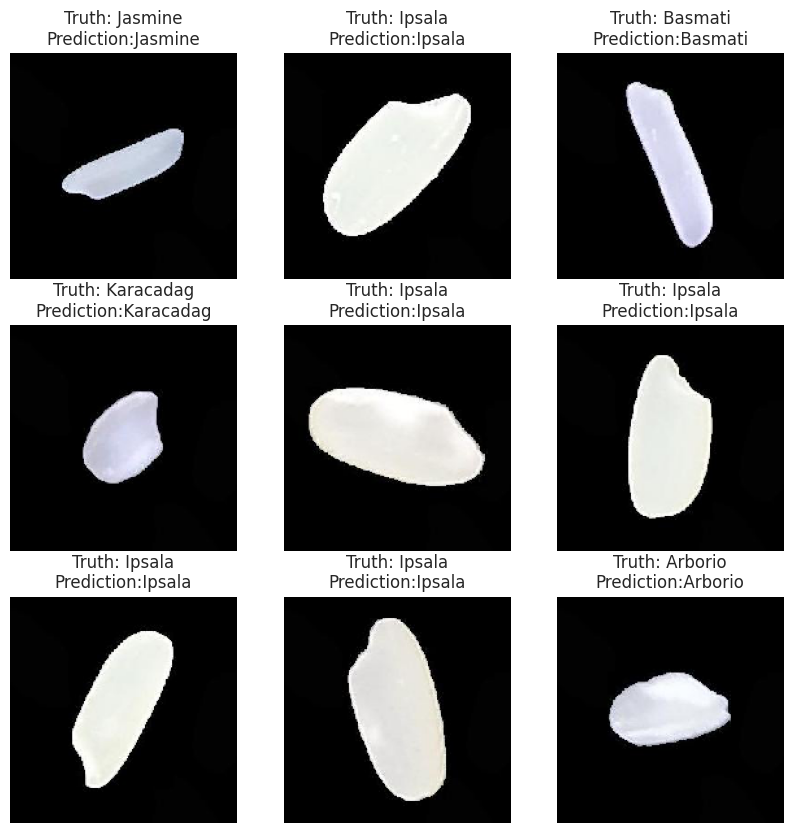

In [47]:
plt.figure(figsize=(10, 10))
x, label= train_ds.next()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = model_vgg16(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = rice_classes[np.argmax(score)]
    plt.title(f'Truth: {rice_classes[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)